In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Prepare Dataset

In [ ]:
x = np.random.rand(100,1)
y = 2*x + 1

먼저, 인덱스를 섞기 위해 (Dataset 내의 data를 무작위로 뽑기 위해) 아래 같이 인덱스를 섞어 보자

In [ ]:
idx = np.arange(100)
np.random.shuffle(idx)

train_idx = idx[:80]
val_idx = idx[80:]

print(train_idx)
print(val_idx)

[60 28  9 12 61 94 46 79 25 43 65 77 78 58 76 48 89  5 51 42 92 44 62 84
 75 57  4 93 14 27 82 98 50 33 55 26 90 97 66 29 87 21 80 52 16 73 86  7
 72 74 20 13 54  3 69 67 40 85 34 70 83 64 45 63 17 24 37 35 71 99 53 23
 19  2 96 18  8 31 36 68]
[11 47 95  1 59 15  6 41 30 22 49 88 56 91 10  0 81 38 39 32]


In [ ]:
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(80, 1) (80, 1)
(20, 1) (20, 1)


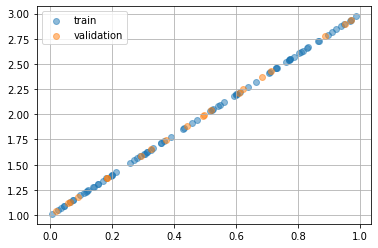

In [ ]:
# Plot  
fig, ax = plt.subplots()  

ax.scatter(x_train, y_train, color='C0', label='train', alpha=0.5)  
ax.scatter(x_val, y_val, color = 'C1', label='validation', alpha=0.5)  
ax.legend()  
ax.grid(True)  
fig.show()

## Set Hyperparameter

In [53]:
LR = 1e-2
EPOCHS = 100

## Modeling

In [59]:
class H():

  def __init__(self,w,b):

    self.W = w
    self.b = b
  
  def forward(self,x):
    
    pred_y = self.W*x +self.b

    return pred_y


In [60]:
w = np.random.rand(80)
b = np.random.rand(80)

# hypothesis = H(w,b)
# h = hypothesis.forward(x_train)
# h

## Training

$\frac{\Delta ((WX+b)-y)^2}{\Delta W} = 2((WX+b)-y)X = 2(error)X$

In [61]:
losses = []

for epoch in range(EPOCHS):

  hypothesis = H(w,b)
  pred = hypothesis.forward(x_train)

  error = (pred - y_train)
  loss = (error**2).mean()

  # get gradient
  grad = (2*error*x_train).mean()

  # update weights
  w -= LR*grad
  b -= LR*grad
  
  print(f'train loss: {round(loss,4)}')
  losses.append(loss)


train loss: 1.7756
train loss: 1.7214
train loss: 1.6689
train loss: 1.6182
train loss: 1.569
train loss: 1.5215
train loss: 1.4755
train loss: 1.431
train loss: 1.3879
train loss: 1.3462
train loss: 1.3059
train loss: 1.2668
train loss: 1.2291
train loss: 1.1926
train loss: 1.1572
train loss: 1.123
train loss: 1.09
train loss: 1.058
train loss: 1.027
train loss: 0.9971
train loss: 0.9681
train loss: 0.9401
train loss: 0.913
train loss: 0.8868
train loss: 0.8614
train loss: 0.8369
train loss: 0.8131
train loss: 0.7902
train loss: 0.768
train loss: 0.7465
train loss: 0.7258
train loss: 0.7057
train loss: 0.6863
train loss: 0.6675
train loss: 0.6494
train loss: 0.6318
train loss: 0.6148
train loss: 0.5984
train loss: 0.5825
train loss: 0.5672
train loss: 0.5524
train loss: 0.538
train loss: 0.5242
train loss: 0.5108
train loss: 0.4978
train loss: 0.4853
train loss: 0.4732
train loss: 0.4615
train loss: 0.4502
train loss: 0.4392
train loss: 0.4287
train loss: 0.4185
train loss: 0.4086
tra

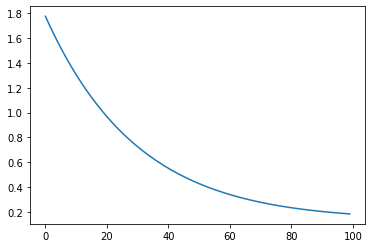

In [62]:
plt.plot(losses)
plt.show()

## Check parameter

우리가 학습시킨 모델의 파라미터(W,b)는 아래와 같다. 나중에 파이토치/텐서플로우에서 학습한 모델을 저장한다는 것은 아래 같은 학습된 파라미터의 값을 저장하는 것으로 간주될 수 있다.

In [64]:
print(w)
print(b)

[1.58589927 1.49387295 1.48819795 1.56205933 1.47830009 1.34349642
 0.84852098 0.74980228 1.63812395 1.33392642 1.51381339 1.19879845
 0.83458429 0.84246189 1.40284139 1.147582   0.91780083 1.20887065
 0.78148504 1.2992475  0.98626951 1.5148352  1.02763806 1.17249625
 0.72889664 0.78972299 1.10976966 1.19721494 1.31729665 1.00893868
 1.41225799 1.5773985  1.49712709 0.75689493 1.19778305 0.82220628
 0.95932112 1.70393869 0.85977164 1.21616425 1.33543184 1.41974107
 1.27692478 0.72704695 1.04373741 1.23498774 0.8051426  1.06790303
 0.75047921 0.7958546  1.11419938 0.84999185 1.28481695 1.40674107
 1.5178628  0.91742635 0.88475868 0.82184394 1.35370635 1.42375183
 0.74886225 1.65348835 0.76924738 1.25857244 1.42633662 1.58824522
 1.43136303 1.51900418 1.05672629 1.53210121 0.79739095 1.61209276
 1.26486848 1.53457387 1.16959439 1.3608538  1.24367876 1.44886562
 0.79890608 0.77762818]
[0.96437933 0.87682078 1.58905967 0.93649009 1.69314136 1.05417189
 0.89939402 1.50697461 1.37598388 1.21

## Evaluate

In [71]:
hypothesis = H(w,b)
pred = hypothesis.forward(x_val)
error = (pred - y_val)
loss = (error**2).mean()
 

print(f'validation loss: {loss}')

validation loss: 0.17320161780967147
